In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.9, rc={'text.usetex': True})
sns.set_style('whitegrid')

import argparse as ap
import model
from pathlib import Path
import json
import torch
import numpy as np
import random
from tools import f
import os
from copy import deepcopy

In [2]:
lpconf = ['log/ensemble/config.json', 'log/last_ensemble/config.json','log/repulsive/config.json', 'log/last_repulsive/config.json']
lpmodels = ['log/ensemble/models', 'log/last_ensemble/models', 'log/repulsive/models', 'log/last_repulsive/models']
titles  = ['Ensemble', 'Ensemble', 'DENN', 'DENN']
lpos_txt = [0.0, 0.0, 0.0, 0.0]
dataset_seed = 2020

# Loading dataset
torch.manual_seed(dataset_seed)
np.random.seed(dataset_seed)
random.seed(dataset_seed)

x_train = (np.random.rand(10).reshape(-1, 1) - 1) / 2  # x between -0.5 and 0.0
y_train = f(x_train)

# Adding a single point at 0.35
nx = np.array([[.25]])
ny = f(nx)
X = np.concatenate([x_train, nx])
Y = np.concatenate([y_train, ny])

x_gt = np.linspace(-0.5, 0.5, 200).reshape(-1, 1)
y_gt = f(x_gt)

Computations

In [3]:
# First figure: deep ensemble model

p_ensemble_before = Path('log/ensemble')
p_ensemble_after = Path('log/last_ensemble')

# Load models
net = model.MLP(dropout_rate=0.0)
nets = []
for modelname in [e for e in os.listdir(p_ensemble_before / 'models') if e[-2:] == 'pt']:
    mynet = deepcopy(net)
    mynet.load_state_dict(torch.load(Path(p_ensemble_before / 'models') / modelname))
    nets.append(mynet)

# Inference
out = []
x = torch.linspace(-.5, .5, 200).view(-1, 1)
for net in nets:
    net.eval()  # To keep the dropout
    with torch.no_grad():
        out.append(net(x).view(-1))

res = torch.stack(out, 0)
m_ensemble_before, s_ensemble_before = res.mean(0).numpy(), res.std(0).numpy()

# Load models
net = model.MLP(dropout_rate=0.0)
nets = []
for modelname in [e for e in os.listdir(p_ensemble_after / 'models') if e[-2:] == 'pt']:
    mynet = deepcopy(net)
    mynet.load_state_dict(torch.load(Path(p_ensemble_after / 'models') / modelname))
    nets.append(mynet)

# Inference
out = []
x = torch.linspace(-.5, .5, 200).view(-1, 1)
for net in nets:
    net.eval()  # To keep the dropout
    with torch.no_grad():
        out.append(net(x).view(-1))

res = torch.stack(out, 0)
m_ensemble_after, s_ensemble_after = res.mean(0).numpy(), res.std(0).numpy()

In [4]:
# Computations for DENN
# First figure: deep ensemble model

p_denn_before = Path('log/repulsive')
p_denn_after = Path('log/last_repulsive')

# Load models
net = model.MLP(dropout_rate=0.0)
nets = []
for modelname in [e for e in os.listdir(p_denn_before / 'models') if e[-2:] == 'pt']:
    mynet = deepcopy(net)
    mynet.load_state_dict(torch.load(Path(p_denn_before / 'models') / modelname))
    nets.append(mynet)

# Inference
out = []
x = torch.linspace(-.5, .5, 200).view(-1, 1)
for net in nets:
    net.eval()  # To keep the dropout
    with torch.no_grad():
        out.append(net(x).view(-1))

res = torch.stack(out, 0)
m_denn_before, s_denn_before = res.mean(0).numpy(), res.std(0).numpy()

# Load models
net = model.MLP(dropout_rate=0.0)
nets = []
for modelname in [e for e in os.listdir(p_denn_after / 'models') if e[-2:] == 'pt']:
    mynet = deepcopy(net)
    mynet.load_state_dict(torch.load(Path(p_denn_after / 'models') / modelname))
    nets.append(mynet)

# Inference
out = []
x = torch.linspace(-.5, .5, 200).view(-1, 1)
for net in nets:
    net.eval()  # To keep the dropout
    with torch.no_grad():
        out.append(net(x).view(-1))

res = torch.stack(out, 0)
m_denn_after, s_denn_after = res.mean(0).numpy(), res.std(0).numpy()

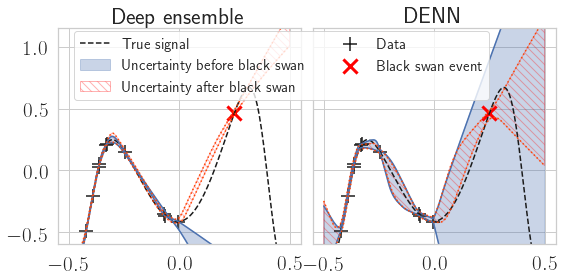

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), squeeze=False, sharex=True, sharey=True)
ax = axes[0, 0]
ax.plot(x_gt, y_gt, 'k--', label='True signal')
ax.fill_between(x.numpy().reshape(-1), m_ensemble_before - s_ensemble_before, m_ensemble_before + s_ensemble_before, color='b', alpha=.3, label='Uncertainty before black swan')
ax.fill_between(x.numpy().reshape(-1), m_ensemble_after - s_ensemble_after, m_ensemble_after + s_ensemble_after, facecolor='None', edgecolor='red', alpha=.3, label='Uncertainty after black swan', hatch="\\\\\\")
ax.plot(x.numpy().reshape(-1), m_ensemble_before - s_ensemble_before, color='b')
ax.plot(x.numpy().reshape(-1), m_ensemble_before + s_ensemble_before, color='b')
ax.plot(x.numpy().reshape(-1), m_ensemble_after - s_ensemble_after, color='orangered', linestyle='dotted')
ax.plot(x.numpy().reshape(-1), m_ensemble_after + s_ensemble_after, color='orangered', linestyle='dotted')
#ax.plot(x.numpy(), res[0, :].numpy(), c='m', label='Sample function')
ax.scatter(x_train, y_train, marker='+', c='k', s=200, label='Data')
blackswan = ax.scatter(0.25, f(0.25), marker='x', c='red', s=200, linewidth=3, label='Black swan event')
ax.axis([-.55, .55, -.6, 1.15])
fig.legend(prop={'size':15}, loc=(.13, .64), ncol=2)
ax.set_title('Deep ensemble')

ax = axes[0, 1]
ax.plot(x_gt, y_gt, 'k--', label='True signal')
ax.fill_between(x.numpy().reshape(-1), m_denn_before - s_denn_before, m_denn_before + s_denn_before, color='b', alpha=.3, label='Uncertainty before black swan')
ax.fill_between(x.numpy().reshape(-1), m_denn_after - s_denn_after, m_denn_after + s_denn_after, facecolor='None', edgecolor='red', alpha=.3, label='Uncertainty after black swan', hatch="\\\\\\")
ax.plot(x.numpy().reshape(-1), m_denn_before - s_denn_before, color='b')
ax.plot(x.numpy().reshape(-1), m_denn_before + s_denn_before, color='b')
ax.plot(x.numpy().reshape(-1), m_denn_after - s_denn_after, color='orangered', linestyle='dotted')
ax.plot(x.numpy().reshape(-1), m_denn_after + s_denn_after, color='orangered', linestyle='dotted')
#ax.plot(x.numpy(), res[0, :].numpy(), c='m', label='Sample function')
ax.scatter(x_train, y_train, marker='+', c='k', s=200, label='Data')
blackswan = ax.scatter(0.25, f(0.25), marker='x', c='red', s=200, linewidth=3, label='Black swan event')
ax.axis([-.55, .55, -.6, 1.15])
ax.set_title('DENN')

plt.tight_layout()
plt.subplots_adjust(hspace=.1, wspace=.05)

filename = 'illustration-objective-2'
path_figs = Path('img')
if not Path.exists(path_figs):
    os.makedirs(path_figs)
path_savefig = path_figs / '{}.pdf'.format(filename)
fig.savefig(path_savefig)

In [27]:
10**(-.5)

0.31622776601683794